In [85]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py

plotter = Plotter()

from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Critical line

In [82]:
data1 = ConfResults(fn="../data/zcritical_N048_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")
dt=0.8

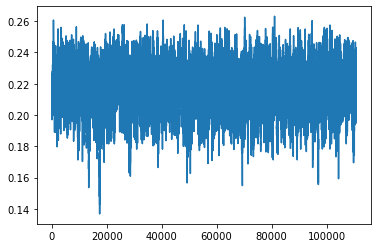

In [8]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

In [88]:
data1.computeFourierPropagator("dsigma",decim=1000, errFunc = lambda x: bootstrap(x,100))

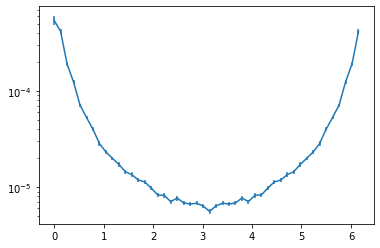

In [93]:
plotter.plot(data1,"propagator", "dsigma")



plt.yscale('log')

ValueError: 'x' and 'y' must have the same size

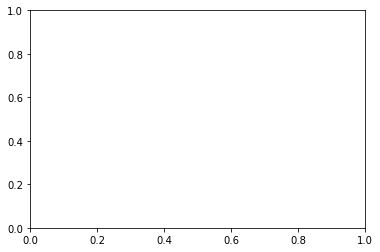

In [92]:
plt.errorbar(data1.momenta_3d, data1.wallFProp["dsigma"])
